In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# reading file from file

df = pd.read_csv(r'G:\RAVI\I_Neuron\iNeuron Project\Heart_Disease_Dataset.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [4]:
# changing column name

df = df.rename(columns = {'num':'Heart Disease'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  Heart Disease  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.shape

(303, 14)

In [7]:
df.isnull().sum()

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
Heart Disease    0
dtype: int64

In [8]:
max_age = df['age'].max()
max_age

77

In [9]:
min_age = df['age'].min()
min_age

29

In [10]:
# creating bins for age

bins = [28,45,60,max_age]
labels = ['below 45', '45-60', 'above 60']

# creating new column 'age_group'
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)


In [11]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart Disease,age_group
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,above 60
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,above 60
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,above 60
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,below 45
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,below 45
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0,45-60
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1,above 60
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0,45-60
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1,above 60
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1,45-60


<AxesSubplot:title={'center':'finding null values using heat map\n'}>

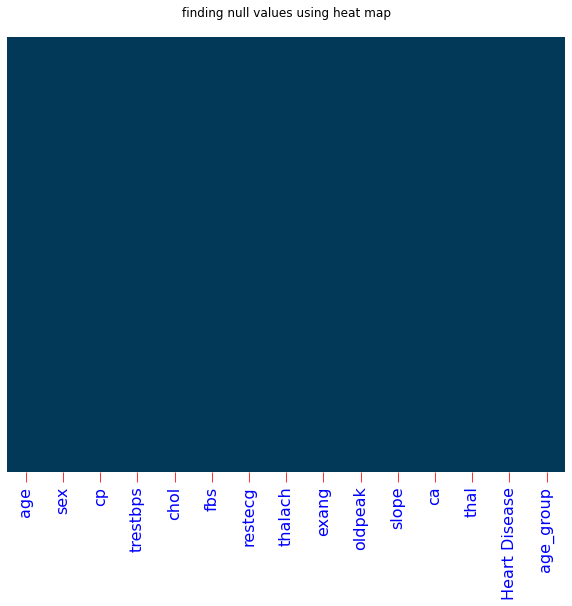

In [12]:
# visualizing null values by heatmap
plt.figure(figsize=(10,8))
plt.xticks(size=16,color='blue')
plt.tick_params(size=10,color='red')
plt.title('finding null values using heat map\n')
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='PuBu_r')

In [13]:
# changing data type
lst = ['sex','cp','fbs','restecg','exang','slope','ca','thal','Heart Disease']

def change_datatype():
    for i in lst:
        df[i]=df[i].astype('category')
        
# calling fuction
change_datatype()

In [14]:
for i in lst:
    print('unique values for ' + '{}'.format(i), df[i].unique())
    
"""
for i in lst:
    print(i, len(df[i].unique()))
"""

unique values for sex [1, 0]
Categories (2, int64): [0, 1]
unique values for cp [1, 4, 3, 2]
Categories (4, int64): [1, 2, 3, 4]
unique values for fbs [1, 0]
Categories (2, int64): [0, 1]
unique values for restecg [2, 0, 1]
Categories (3, int64): [0, 1, 2]
unique values for exang [0, 1]
Categories (2, int64): [0, 1]
unique values for slope [3, 2, 1]
Categories (3, int64): [1, 2, 3]
unique values for ca [0, 3, 2, 1, -100000]
Categories (5, int64): [-100000, 0, 1, 2, 3]
unique values for thal [6, 3, 7, -100000]
Categories (4, int64): [-100000, 3, 6, 7]
unique values for Heart Disease [0, 1]
Categories (2, int64): [0, 1]


'\nfor i in lst:\n    print(i, len(df[i].unique()))\n'

In [15]:
print(np.where(df['ca'] == -100000))
print(np.where(df['thal'] == -100000))

(array([166, 192, 287, 302], dtype=int64),)
(array([ 87, 266], dtype=int64),)


In [16]:
# replacing error values with mode
df['ca'] = df['ca'].replace([-100000], df['ca'].mode())
print(df['ca'].unique())

df['thal'] = df['thal'].replace([-100000], df['thal'].mode())
print(df['thal'].unique())

[0, 3, 2, 1]
Categories (4, int64): [0, 1, 2, 3]
[6, 3, 7]
Categories (3, int64): [3, 6, 7]


In [17]:
print(df['ca'].unique())
print(df['thal'].unique())

[0, 3, 2, 1]
Categories (4, int64): [0, 1, 2, 3]
[6, 3, 7]
Categories (3, int64): [3, 6, 7]


In [18]:
# proper formatting categorical values

def gender(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
    
# calling function
df['sex'] = df['sex'].apply(gender)

In [19]:
# proper formatting cp values

def chest_pain(cp):
    if cp == 1:
        return 'typical angina'
    elif cp == 2:
        return 'atypical angina'
    elif cp == 3:
        return 'non-anginal pain'
    else:
        return 'asymptomatic'
    
# calling function
df['cp'] = df['cp'].apply(chest_pain)

In [20]:
# proper formatting fbs values

def fasting_bloodsugar(fbs):
    if fbs == 0:
        return 'below 120mg/dl'
    else:
        return 'above 120 mg/dl'
    
# calling function
df['fbs'] = df['fbs'].apply(fasting_bloodsugar)

In [21]:
# proper formatting categorical values

def resting_ecg(restecg):
    if restecg == 0:
        return 'normal'
    elif restecg == 1:
        return 'abnormality'
    else:
        return 'hypertrophy'
    
# calling function
df['restecg'] = df['restecg'].apply(resting_ecg)

In [22]:
# proper formatting categorical values

def exercised_angina(exang):
    if exang == 0:
        return 'no'
    else:
        return 'yes'
    
# calling function
df['exang'] = df['exang'].apply(exercised_angina)

In [23]:
# proper formatting categorical values
def slope_segment(slope):
    if slope == 1:
        return 'upsloping'
    elif slope == 2:
        return 'flat'
    else:
        return 'downsloping'
    
# calling function
df['slope'] = df['slope'].apply(slope_segment)

In [24]:
# proper formatting categorical values

def thal_effect(thal):
    if thal == 3:
        return 'normal'
    elif thal == 6:
        return 'fixed defect'
    else:
        return 'reversable defect'
    
# calling function
df['thal'] = df['thal'].apply(thal_effect)

In [25]:
# proper formatting categorical values

def disease(target):
    if target == 0:
        return 'absent'
    else:
        return 'pesent'
    
# calling function
df['Heart Disease'] = df['Heart Disease'].apply(disease)

In [26]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart Disease,age_group
0,63,male,typical angina,145,233,above 120 mg/dl,hypertrophy,150,no,2.3,downsloping,0,fixed defect,absent,above 60
1,67,male,asymptomatic,160,286,below 120mg/dl,hypertrophy,108,yes,1.5,flat,3,normal,pesent,above 60
2,67,male,asymptomatic,120,229,below 120mg/dl,hypertrophy,129,yes,2.6,flat,2,reversable defect,pesent,above 60
3,37,male,non-anginal pain,130,250,below 120mg/dl,normal,187,no,3.5,downsloping,0,normal,absent,below 45
4,41,female,atypical angina,130,204,below 120mg/dl,hypertrophy,172,no,1.4,upsloping,0,normal,absent,below 45
5,56,male,atypical angina,120,236,below 120mg/dl,normal,178,no,0.8,upsloping,0,normal,absent,45-60
6,62,female,asymptomatic,140,268,below 120mg/dl,hypertrophy,160,no,3.6,downsloping,2,normal,pesent,above 60
7,57,female,asymptomatic,120,354,below 120mg/dl,normal,163,yes,0.6,upsloping,0,normal,absent,45-60
8,63,male,asymptomatic,130,254,below 120mg/dl,hypertrophy,147,no,1.4,flat,1,reversable defect,pesent,above 60
9,53,male,asymptomatic,140,203,above 120 mg/dl,hypertrophy,155,yes,3.1,downsloping,0,reversable defect,pesent,45-60


<AxesSubplot:>

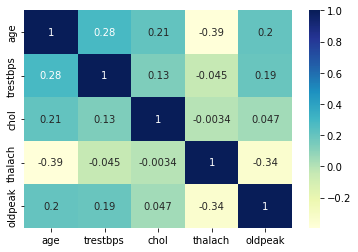

In [27]:
# correlation with heatmap

#plt.figure(figsize=(20,10))
#sns.heatmap(df.corr(), annot=True, cmap='magma', fmt='.2g')

sns.heatmap(data = df.corr(), cmap = 'YlGnBu', annot = True )

age_group,below 45,45-60,above 60,All
cp,,,,
typical angina,5,10,8,23
atypical angina,16,27,7,50
non-anginal pain,19,46,21,86
asymptomatic,23,78,43,144
All,63,161,79,303


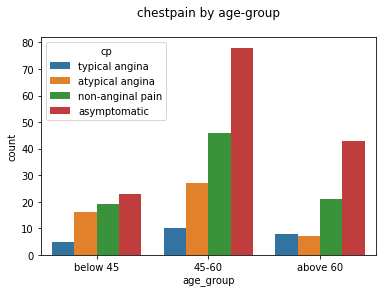

In [28]:
# Type of chest-pain by age-group

sns.countplot(data = df,
              x = 'age_group',
              hue = 'cp')
plt.title('chestpain by age-group\n')

pd.crosstab(df['cp'], df['age_group'], margins = True)

sex,female,male,All
cp,,,
typical angina,4,19,23
atypical angina,18,32,50
non-anginal pain,35,51,86
asymptomatic,40,104,144
All,97,206,303


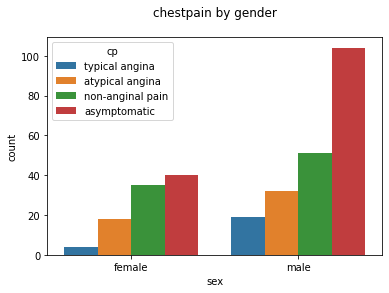

In [50]:
# Type of chest-pain by gender

sns.countplot(data = df,
              x = 'sex',
              hue = 'cp')
plt.title('chestpain by gender\n')

pd.crosstab(df['cp'], df['sex'], margins = True)

age_group,below 45,45-60,above 60,All
Heart Disease,,,,
absent,47,82,35,164
pesent,16,79,44,139
All,63,161,79,303


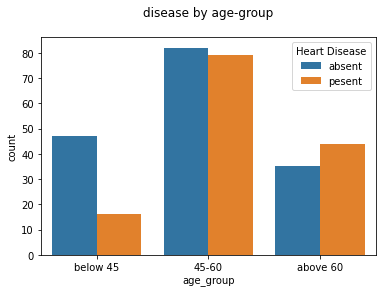

In [29]:
# Distribution of Age-group by disease

sns.countplot(data = df,
              x = 'age_group',
              hue = 'Heart Disease')
plt.title('disease by age-group\n')

pd.crosstab(df['Heart Disease'], df['age_group'], margins = True)

#  The graph above shows that age really does play an important role in the presence of disease as patients below 35 years are least affected by heart disease.

Heart Disease,absent,pesent,All
sex,,,
female,72,25,97
male,92,114,206
All,164,139,303


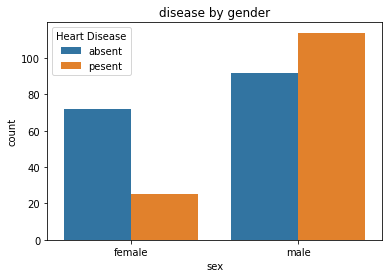

In [30]:
# Disease by Gender

sns.countplot(data = df,
              x = 'sex',
              hue = 'Heart Disease')
plt.title('disease by gender')

pd.crosstab(df['sex'], df['Heart Disease'], margins = True)

# According to the graph above, it is illustrated that men are at higher risk of having a heart disease, as the graph shows that men with heart disease are about four times the number of women with heart disease.

Heart Disease,absent,pesent,All
cp,,,
typical angina,16,7,23
atypical angina,41,9,50
non-anginal pain,68,18,86
asymptomatic,39,105,144
All,164,139,303


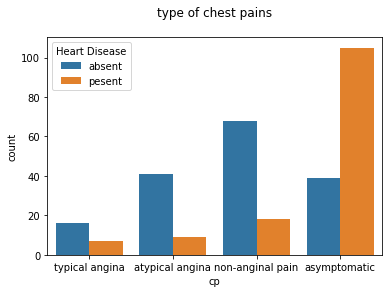

In [31]:
# Chest-pain by Disease

sns.countplot(data = df,
              x = 'cp',
              hue = 'Heart Disease')
plt.title('type of chest pains\n')

pd.crosstab(df['cp'], df['Heart Disease'], margins = True)

# The data shows that patients with asymptomatic are more prone to suffer from heart disease and its matter of concern.

Heart Disease,absent,pesent,All
fbs,,,
below 120mg/dl,141,117,258
above 120 mg/dl,23,22,45
All,164,139,303


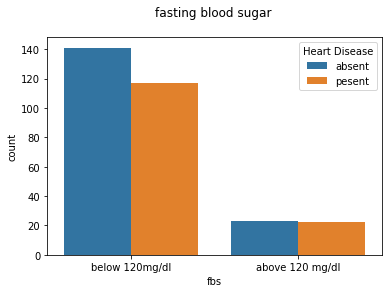

In [32]:
# fasting-blood sugar by Disease

sns.countplot(data = df,
              x = 'fbs',
              hue = 'Heart Disease')
plt.title('fasting blood sugar \n')

pd.crosstab(df['fbs'], df['Heart Disease'], margins = True)

# The fasting blood glucose of the patients doesn't seem to follow expectations as individuals with FBG below 120mg/dl seem to have more patients with the disease than patients with glucose level above 120mg/dl.

Heart Disease,absent,pesent,All
restecg,,,
normal,95,56,151
abnormality,1,3,4
hypertrophy,68,80,148
All,164,139,303


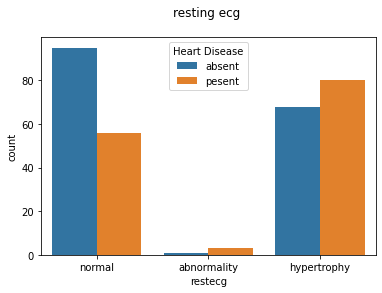

In [33]:
# resting ecg by dissease

sns.countplot(data = df,
              x = 'restecg',
              hue = 'Heart Disease')
plt.title('resting ecg \n')

pd.crosstab(df['restecg'], df['Heart Disease'], margins = True)

# The patients with hypertrophy contribute to the highest number of patients with heart disease.

Heart Disease,absent,pesent,All
exang,,,
no,141,63,204
yes,23,76,99
All,164,139,303


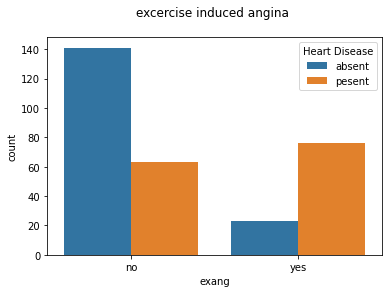

In [34]:
# exercise induced angina by disease

sns.countplot(data = df,
              x = 'exang',
              hue = 'Heart Disease')
plt.title('excercise induced angina \n')

pd.crosstab(df['exang'], df['Heart Disease'], margins = True)

# Exercise induced angina also known as stable angina, is usually triggered by physical activity like climbing the stairs. Physical activity causes the heart to demand more blood, but narrowed arteries slow down blood flow resulting in chest pain. The graph above explains that the patients that experienced exercise induced angina have a higher ratio of heart disease than patients that did not experience exercise induced angina.

sex,female,male,All
exang,,,
no,75,129,204
yes,22,77,99
All,97,206,303


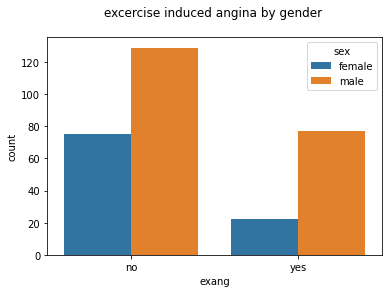

In [51]:
# exercise induced angina by gender

sns.countplot(data = df,
              x = 'exang',
              hue = 'sex')
plt.title('excercise induced angina by gender \n')

pd.crosstab(df['exang'], df['sex'], margins = True)

Heart Disease,absent,pesent,All
slope,,,
upsloping,106,36,142
flat,49,91,140
downsloping,9,12,21
All,164,139,303


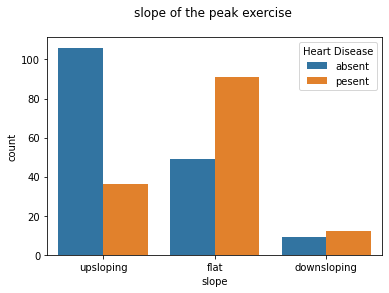

In [35]:
sns.countplot(data = df,
              x = 'slope',
              hue = 'Heart Disease')
plt.title('slope of the peak exercise \n')

pd.crosstab(df['slope'], df['Heart Disease'], margins = True)

# The graph above shows patient with flat and downsloping have higher number of patient with disease.

Heart Disease,absent,pesent,All
ca,,,
0,133,47,180
1,21,44,65
2,7,31,38
3,3,17,20
All,164,139,303


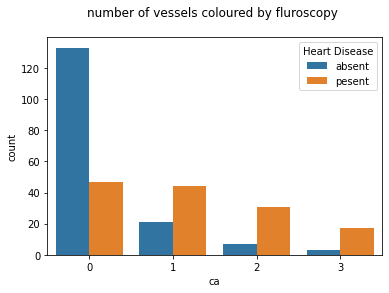

In [36]:
sns.countplot(data = df,
             x = 'ca', 
             hue = 'Heart Disease')
plt.title('number of vessels coloured by fluroscopy \n')

pd.crosstab(df['ca'], df['Heart Disease'], margins = True)

# Colored blood vessels signify narrowed artery, that is why as shown by the graph, increase in the colored blood vessels result in higher likelihood to have a heart disease.

Heart Disease,absent,pesent,All
thal,,,
normal,130,38,168
fixed defect,6,12,18
reversable defect,28,89,117
All,164,139,303


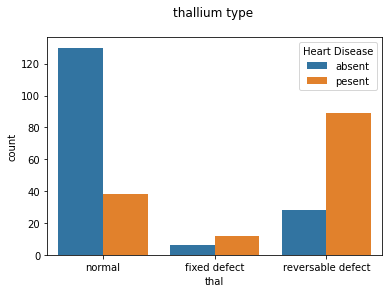

In [37]:
sns.countplot(data = df,
              x = 'thal',
              hue = 'Heart Disease')
plt.title('thallium type \n')

pd.crosstab(df['thal'], df['Heart Disease'], margins = True)

#  Result from the thallium test show that patients with defect whether reversible or fixed were more likely to have a heart disease than patients with normal blood flow.

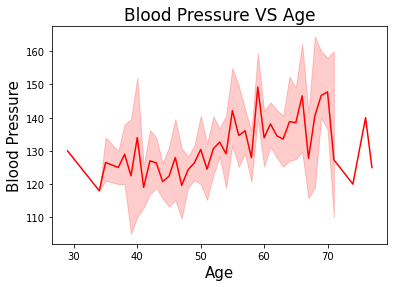

In [90]:
sns.lineplot(x='age', y='trestbps', data=df, color='r')
plt.title('Blood Pressure VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

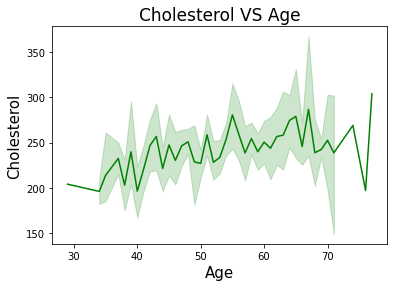

In [91]:
sns.lineplot(x='age', y='chol', data=df, color='g')
plt.title('Cholesterol VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Cholesterol', fontsize=15)
plt.show()

Text(0.5, 1.0, 'boxplot for age vs target')

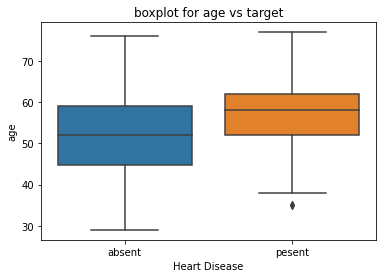

In [38]:
# boxplot
sns.boxplot(data = df, 
            x = 'Heart Disease',
            y = 'age')
plt.title('boxplot for age vs target')

Text(0.5, 1.0, 'boxplot for trestbps vs target')

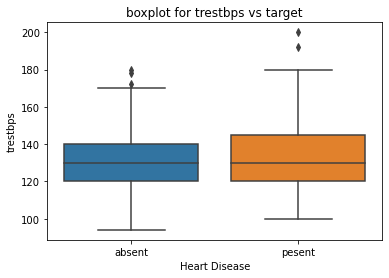

In [39]:
sns.boxplot(data = df,
            x = 'Heart Disease',
            y = 'trestbps')
plt.title('boxplot for trestbps vs target')

<AxesSubplot:xlabel='Heart Disease', ylabel='chol'>

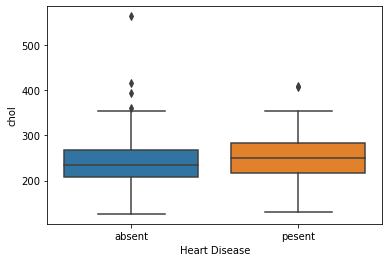

In [40]:
sns.boxplot(data = df,
            y = 'chol', 
            x = 'Heart Disease')

<AxesSubplot:xlabel='Heart Disease', ylabel='thalach'>

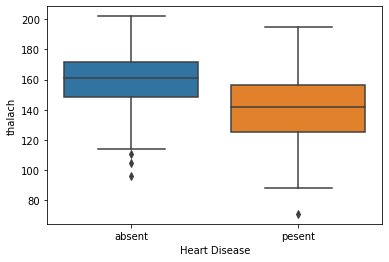

In [41]:
sns.boxplot(data = df,
            x = 'Heart Disease',
            y = 'thalach')

Text(0.5, 1.0, 'age distribution')

<Figure size 1440x1080 with 0 Axes>

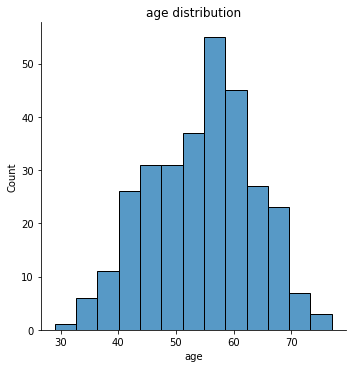

In [49]:
# distribution plot-age

plt.figure(figsize=(20,15))
sns.displot(df['age'], kde = False)
plt.title('age distribution')

Text(0.5, 1.0, 'age distribution of heart disease patients')

<Figure size 1152x720 with 0 Axes>

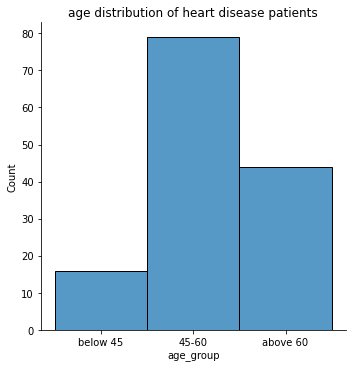

In [42]:
# distribution plot

plt.figure(figsize=(16,10))
sns.displot(df[df['Heart Disease']=='pesent']['age_group'], kde = False)
plt.title('age distribution of heart disease patients')

Text(0.5, 1.0, 'age distribution of no heart disease patients')

<Figure size 1152x720 with 0 Axes>

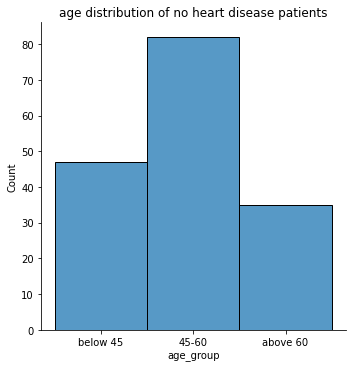

In [43]:
# distribution plot

plt.figure(figsize=(16,10))
sns.displot(df[df['Heart Disease']=='absent']['age_group'], kde = False)
plt.title('age distribution of no heart disease patients')

Text(0.5, 1.0, 'age distribution of no heart disease patients')

<Figure size 1152x720 with 0 Axes>

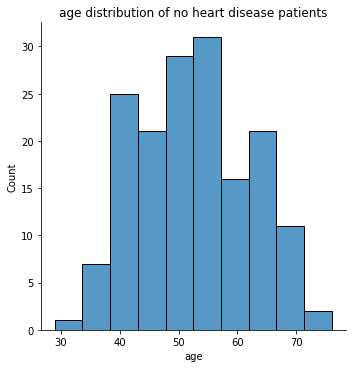

In [44]:
# distribution plot

plt.figure(figsize=(16,10))
sns.displot(df[df['Heart Disease']=='absent']['age'], kde = False, bins = 10)
plt.title('age distribution of no heart disease patients')

Text(0.5, 1.0, 'chol distribution of normal heart patients')

<Figure size 1152x720 with 0 Axes>

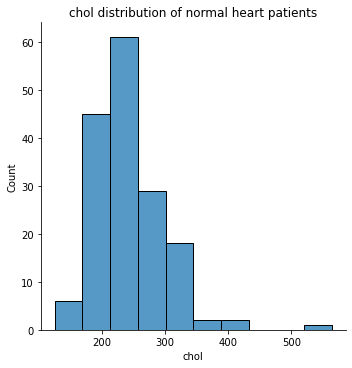

In [45]:
# distribution plot
plt.figure(figsize=(16,10))
sns.displot(df[df['Heart Disease']=='absent']['chol'], kde = False, bins = 10)
plt.title('chol distribution of normal heart patients')

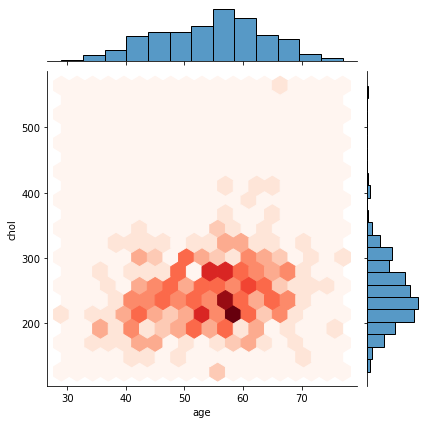

In [46]:
# jointplot
sns.jointplot(data = df, x = 'age', y = 'chol', kind = 'hex', cmap = 'Reds')

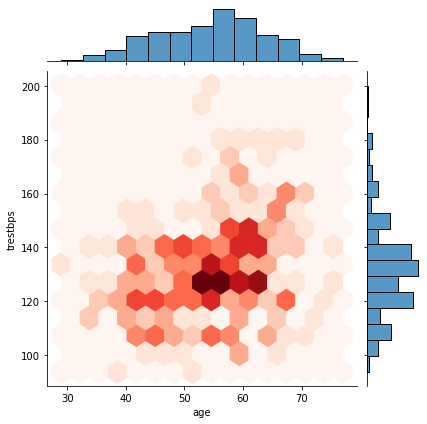

In [47]:
# jointplot
sns.jointplot(data = df, x = 'age', y = 'trestbps', kind = 'hex', cmap = 'Reds')

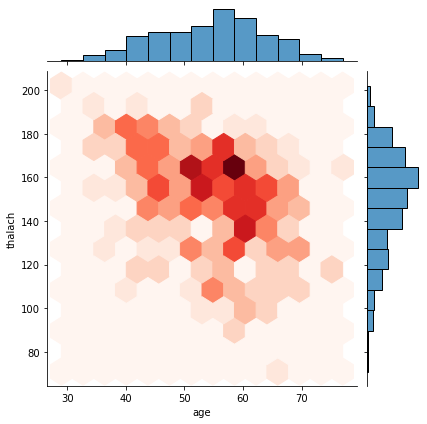

In [48]:
# jointplot
sns.jointplot(data = df, x = 'age', y = 'thalach', kind = 'hex', cmap = 'Reds')

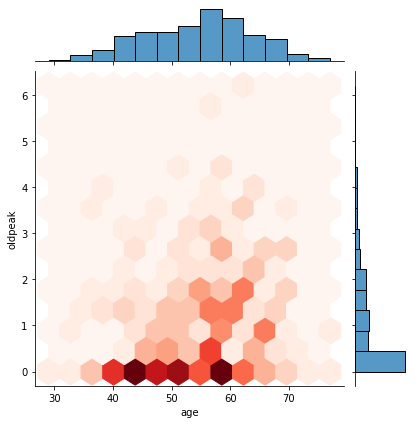

In [49]:
# jointplot
sns.jointplot(data = df, x = 'age', y = 'oldpeak', kind = 'hex', cmap = 'Reds')

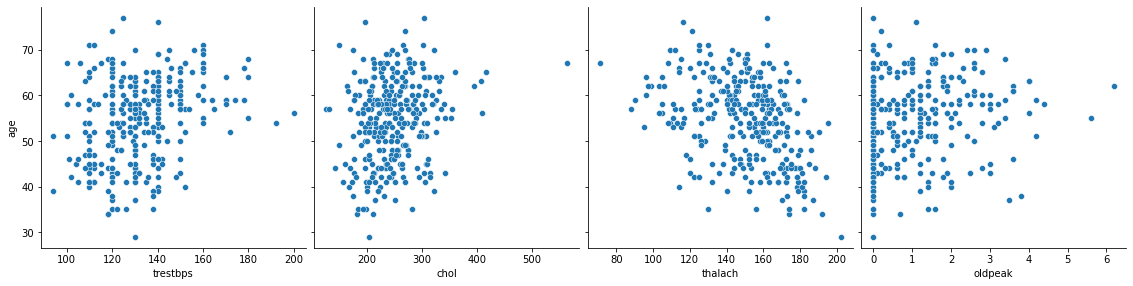

In [50]:
# pairrplot
sns.pairplot(data = df, x_vars = ['trestbps', 'chol', 'thalach', 'oldpeak'], y_vars = 'age', height=4, kind='scatter')

In [51]:
pd.crosstab(df['sex'], df['Heart Disease'], margins = True)

Heart Disease,absent,pesent,All
sex,,,
female,72,25,97
male,92,114,206
All,164,139,303


In [52]:
pd.crosstab(df['age'], df['Heart Disease'], margins = True).max()

Heart Disease
absent    164
pesent    139
All       303
dtype: int64

In [53]:
pd.crosstab(df['age'], df['Heart Disease'], margins = True)

Heart Disease,absent,pesent,All
age,,,
29,1,0,1
34,2,0,2
35,2,2,4
37,2,0,2
38,1,1,2
39,3,1,4
40,1,2,3
41,9,1,10
42,7,1,8


In [54]:
disease_by_sex = df.groupby('sex')
disease_by_sex.first()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart Disease,age_group
sex,,,,,,,,,,,,,,
female,41,atypical angina,130,204,below 120mg/dl,hypertrophy,172,no,1.4,upsloping,0,normal,absent,below 45
male,63,typical angina,145,233,above 120 mg/dl,hypertrophy,150,no,2.3,downsloping,0,fixed defect,absent,above 60


In [55]:
disease_by_sex.chol.mean()

sex
female    261.752577
male      239.601942
Name: chol, dtype: float64

In [56]:
heart_disease_by_gender = df.groupby('Heart Disease')

In [57]:
heart_disease_by_gender.first()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age_group
Heart Disease,,,,,,,,,,,,,,
absent,63,male,typical angina,145,233,above 120 mg/dl,hypertrophy,150,no,2.3,downsloping,0,fixed defect,above 60
pesent,67,male,asymptomatic,160,286,below 120mg/dl,hypertrophy,108,yes,1.5,flat,3,normal,above 60


In [58]:
heart_disease_by_gender.last()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age_group
Heart Disease,,,,,,,,,,,,,,
absent,38,male,non-anginal pain,138,175,below 120mg/dl,normal,173,no,0.0,upsloping,0,normal,below 45
pesent,57,female,atypical angina,130,236,below 120mg/dl,hypertrophy,174,no,0.0,flat,1,normal,45-60


In [59]:
heart_disease_by_gender.max()

C:\Users\RAVIKU~1\AppData\Local\Temp/ipykernel_904/1680010642.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  heart_disease_by_gender.max()


,age,trestbps,chol,thalach,oldpeak,age_group
Heart Disease,,,,,,
absent,76,180,564,202,4.2,above 60
pesent,77,200,409,195,6.2,above 60


In [60]:
group_sex_target = df.groupby(['sex', 'Heart Disease'])
group_sex_target.first()

age               cp  trestbps  chol              fbs  \
sex    Heart Disease                                                          
female absent          41  atypical angina       130   204   below 120mg/dl   
       pesent          62     asymptomatic       140   268   below 120mg/dl   
male   absent          63   typical angina       145   233  above 120 mg/dl   
       pesent          67     asymptomatic       160   286   below 120mg/dl   

                          restecg  thalach exang  oldpeak        slope ca  \
sex    Heart Disease                                                        
female absent         hypertrophy      172    no      1.4    upsloping  0   
       pesent         hypertrophy      160    no      3.6  downsloping  2   
male   absent         hypertrophy      150    no      2.3  downsloping  0   
       pesent         hypertrophy      108   yes      1.5         flat  3   

                              thal age_group  
sex    Heart Disease                          
female absent               normal  below 45  
       pesent               normal  above 60  
male   absent         fixed defect  above 60  
       pesent               normal  above 60

In [61]:
group_by_restecg = df.groupby(['restecg','sex'])
group_by_restecg.count()

age   cp  trestbps  chol  fbs  thalach  exang  oldpeak  \
restecg     sex                                                              
normal      female   49   49        49    49   49       49     49       49   
            male    102  102       102   102  102      102    102      102   
abnormality female    3    3         3     3    3        3      3        3   
            male      1    1         1     1    1        1      1        1   
hypertrophy female   45   45        45    45   45       45     45       45   
            male    103  103       103   103  103      103    103      103   

                    slope   ca  thal  Heart Disease  age_group  
restecg     sex                                                 
normal      female     49   49    49             49         49  
            male      102  102   102            102        102  
abnormality female      3    3     3              3          3  
            male        1    1     1              1          1  
hypertrophy female     45   45    45             45         45  
            male      103  103   103            103        103

In [62]:
pd.pivot_table(df, index=['Heart Disease', 'exang', 'cp'], values = 'age', aggfunc = [min, max, np.mean, np.median, np.std])

min max       mean median        std
                                     age age        age    age        age
Heart Disease exang cp                                                   
absent        no    asymptomatic      35  71  54.137931   54.0   9.295637
                    atypical angina   29  71  49.052632   48.5   9.188557
                    non-anginal pain  37  76  52.672131   52.0   9.554617
                    typical angina    34  69  57.230769   59.0  10.296875
              yes   asymptomatic      45  64  53.900000   55.0   7.171704
                    atypical angina   54  74  62.333333   59.0  10.408330
                    non-anginal pain  41  61  50.285714   51.0   7.296444
                    typical angina    40  64  51.666667   51.0  12.013881
pesent        no    asymptomatic      39  70  57.228571   60.0   8.506350
                    atypical angina   48  62  56.375000   57.0   4.033343
                    non-anginal pain  46  69  56.785714   58.0   7.495420
                    typical angina    45  65  58.000000   59.0   6.782330
              yes   asymptomatic      35  77  55.885714   57.0   7.895225
                    atypical angina   66  66  66.000000   66.0        NaN
                    non-anginal pain  56  70  64.500000   66.0   6.191392
                    typical angina    38  38  38.000000   38.0        NaN

In [63]:
pd.pivot_table(df, index = ['sex','Heart Disease','cp'], values = 'age')

age
sex    Heart Disease cp                         
female absent        typical angina    63.250000
                     atypical angina   51.250000
                     non-anginal pain  54.764706
                     asymptomatic      55.166667
       pesent        atypical angina   57.500000
                     non-anginal pain  62.000000
                     asymptomatic      59.090909
male   absent        typical angina    53.833333
                     atypical angina   49.240000
                     non-anginal pain  50.088235
                     asymptomatic      53.142857
       pesent        typical angina    55.142857
                     atypical angina   57.428571
                     non-anginal pain  58.294118
                     asymptomatic      55.602410